In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import copy
matplotlib.rcParams['figure.figsize'] = (12, 8)

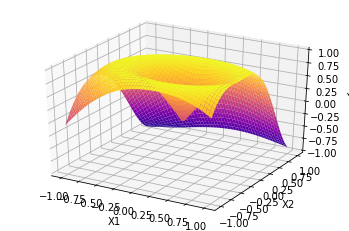

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [3]:
# %matplotlib tk

# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot_surface(X1, X2, Y, cmap='plasma')
# # ax.scatter(X1, X2, Y)
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Y')
# plt.show()

### Using Neural Network

In [4]:
n_hidden = 4
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)

# def reposition_break_if_necessary(self:tnn.DoubleReluLinearLayer):
#     pass

In [5]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.33723105387936514


100 Error =  0.03326544524311009


200 Error =  0.02720987176676664


300 Error =  0.022658067759584236


400 Error =  0.019598711664804577


500 Error =  0.018668783605079297


600 Error =  0.018391595809843824


700 Error =  0.018151852199989334


800 Error =  0.017900547424519266


900 Error =  0.01782125953566374


1000 Error =  0.01780756828206676


1100 Error =  0.017804804098239167


1200 Error =  0.017804785583267754


1300 Error =  0.017804786676715024


1400 Error =  0.017804787575028548


TclError: invalid command name "pyimage11"

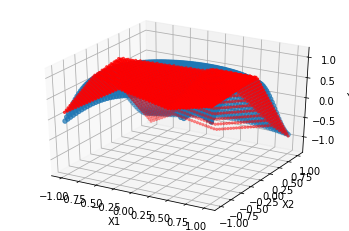

In [6]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [7]:
layer1.weights, layer1.bias

(array([[ 1.4328028 , -0.82381379,  1.76297761,  0.98470279],
        [-1.93020741, -0.49620211,  0.41979396,  1.76474451]]),
 array([ 0.83402847, -0.68432264, -0.35635869, -1.11394973]))

## Factorize the final weights

In [8]:
layer2.weights.shape

(8, 1)

In [9]:
n_hidden2 = 4
optimizer = tnn.SGD()

# w2 = np.random.normal(size=(n_hidden,n_hidden2))
w2_layer = tnn.WeightsLayer(n_hidden*2, n_hidden2, optimizer=optimizer)
w3_layer = tnn.WeightsLayer(n_hidden2, 1, optimizer=optimizer)

In [10]:
for epoch in range(100000):
    wout = w3_layer.forward(w2_layer.weights)
    dw = wout - layer2.weights
    dw2 = w3_layer.backward(dw/dw.shape[1]) 
    w2_layer.del_weights = dw2
    
    w2_layer.update()
    w3_layer.update()
    
    if epoch%10000 == 0:
        error = (dw**2).mean()
        print(epoch, 'Error = ', error)

0 Error =  2.691412466721795
10000 Error =  2.8248156162124447e-30
20000 Error =  2.8248156162124447e-30
30000 Error =  2.8248156162124447e-30
40000 Error =  2.8248156162124447e-30
50000 Error =  2.8248156162124447e-30
60000 Error =  2.8248156162124447e-30
70000 Error =  2.8248156162124447e-30
80000 Error =  2.8248156162124447e-30
90000 Error =  2.8248156162124447e-30


In [11]:
w2_layer.weights@w3_layer.weights

array([[ 0.05821994],
       [-1.97058696],
       [ 0.0675795 ],
       [-1.23301018],
       [ 0.96471803],
       [-0.22767216],
       [-0.38568396],
       [ 0.03199216]])

In [12]:
layer2.weights

array([[ 0.05821994],
       [-1.97058696],
       [ 0.0675795 ],
       [-1.23301018],
       [ 0.96471803],
       [-0.22767216],
       [-0.38568396],
       [ 0.03199216]])

In [13]:
layer2.output

array([[ 0.15501049],
       [ 0.19820876],
       [ 0.24140702],
       ...,
       [-0.87545797],
       [-0.90909192],
       [-0.94272586]])

In [14]:
new_out = (layer2.zee@w2_layer.weights)@w3_layer.weights + layer2.bias
new_out

array([[ 0.15501688],
       [ 0.19821529],
       [ 0.24141369],
       ...,
       [-0.8754576 ],
       [-0.90909141],
       [-0.94272523]])

In [15]:
layer2.output - new_out

array([[-6.38976377e-06],
       [-6.53066859e-06],
       [-6.67157342e-06],
       ...,
       [-3.74241661e-07],
       [-5.03969976e-07],
       [-6.33698292e-07]])

##### Making Neural networks with these weights and zero bias on second layer

In [16]:
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden,
                          weights=copy.deepcopy(layer1.weights),
                          bias = copy.deepcopy(layer1.bias),
                          optimizer=optimizer)
# drelu_ = tnn.DoubleRelu()
# layer2_ = tnn.LinearLayer(n_hidden*2,n_hidden2,
#                                     weights=w2_layer.weights,
#                                     optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, n_hidden2,
                                    weights=copy.deepcopy(w2_layer.weights),
                                    optimizer=optimizer)
layer3_ = tnn.LinearLayer(n_hidden2,1,
                                    weights=copy.deepcopy(w3_layer.weights),
                                    bias = copy.deepcopy(layer2.bias),
                                    optimizer=optimizer)

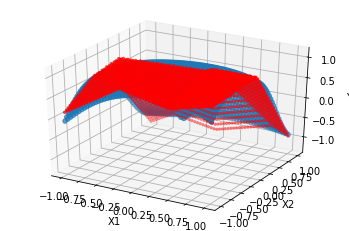

In [17]:
yout_ = net_.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [18]:
yout_ - yout

array([[ 8.15105233e-06],
       [ 8.45869200e-06],
       [ 8.76633168e-06],
       ...,
       [-1.28647774e-05],
       [-1.28102906e-05],
       [-1.27558037e-05]])

In [19]:
((yout - yy)**2).mean(), ((yout_ - yy)**2).mean() ## there is little change in error..

(0.017804787575028548, 0.017804785499246325)

#### Double Relu Layer from the Linear Layer

In [20]:
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden,
                          weights=copy.deepcopy(layer1.weights),
                          bias = copy.deepcopy(layer1.bias),
                          optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, n_hidden2,
                                    weights=copy.deepcopy(w2_layer.weights),
                                    optimizer=optimizer)
layer3_ = tnn.DoubleReluLinearLayer(n_hidden2,1,
                                    weights=np.vstack([w3_layer.weights,w3_layer.weights]),
                                    bias = copy.deepcopy(layer2.bias),
                                    optimizer=optimizer)

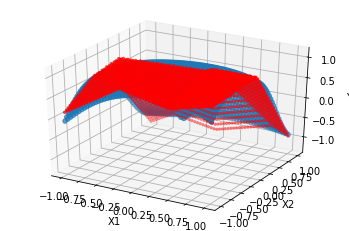

In [21]:
yout_ = net_.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [22]:
((yout - yy)**2).mean(), ((yout_ - yy)**2).mean() ## there is little change in error..

(0.017804787575028548, 0.017804785499246325)

## Adding Noise

In [23]:
# noise_old = 0.1
# noise_old_w1 = np.random.normal(loc=0, scale=noise_old, size=layer1_.weights.shape)
# noise_old_b1 = np.random.normal(loc=0, scale=noise_old, size=layer1_.bias.shape)

# layer1_.weights += noise_old_w1
# layer1_.bias += noise_old_b1

# noise_old_w2 = np.random.normal(loc=0, scale=noise_old, size=layer2_.weights.shape)
# noise_old_b2 = np.random.normal(loc=0, scale=noise_old, size=layer2_.bias.shape)

# layer2_.weights += noise_old_w2
# layer2_.bias += noise_old_b2

### Training the network

In [25]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout_ = net_.forward(xx)
    dy = yout_ - yy
    dx = net_.backward(dy)
    
    net_.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.003483201973952548


100 Error =  0.0034178315532114065


200 Error =  0.004228306999484008


300 Error =  0.003320973056180142


400 Error =  0.0032755657040731473


500 Error =  0.003247115579121116


600 Error =  0.0032648654788680885


700 Error =  0.0032675534922983196


800 Error =  0.0038649642936426673


900 Error =  0.0031794540992768072


1000 Error =  0.003368173029706398


TclError: invalid command name "pyimage38"

In [ ]:
layer1_.weights, layer1_.bias

In [ ]:
yout_ = net_.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Training the same network from scratch

In [108]:
optimizer = tnn.Adam()

net_0 = tnn.AutoForm(new_layers=True)
layer1_0 = tnn.LinearLayer(2, n_hidden,
                          optimizer=optimizer)
layer2_0 = tnn.DoubleReluLinearLayer(n_hidden, n_hidden2,
                                    optimizer=optimizer)
layer3_0 = tnn.DoubleReluLinearLayer(n_hidden2,1,
                                    optimizer=optimizer)

In [110]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout_0 = net_0.forward(xx)
    dy = yout_0 - yy
    dx = net_0.backward(dy)
    
    net_0.update()
    
#     ## Adding noise to the trained weights
#     if epoch%1000 == 0:
#         noise_old = 0.2
#         noise_old_w1 = np.random.normal(loc=0, scale=noise_old, size=layer1_0.weights.shape)
#         noise_old_b1 = np.random.normal(loc=0, scale=noise_old, size=layer1_0.bias.shape)

#         layer1_0.weights += noise_old_w1
#         layer1_0.bias += noise_old_b1

#         noise_old_w2 = np.random.normal(loc=0, scale=noise_old, size=layer2_0.weights.shape)
#         noise_old_b2 = np.random.normal(loc=0, scale=noise_old, size=layer2_0.bias.shape)

#         layer2_0.weights += noise_old_w2
#         layer2_0.bias += noise_old_b2
        
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout_0.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.00688054459847578


100 Error =  0.006656948038416186


200 Error =  0.006901926666464115


300 Error =  0.006656744154565794


400 Error =  0.006859021791146946


500 Error =  0.006656529664922002


600 Error =  0.006749914983611199


700 Error =  0.0066564291953901044


800 Error =  0.006656304942351005


900 Error =  0.006682465875622243


1000 Error =  0.006656830836746167


1100 Error =  0.006658169558509084


1200 Error =  0.0066557980604101405


1300 Error =  0.006655814442359528


TclError: invalid command name "pyimage239"

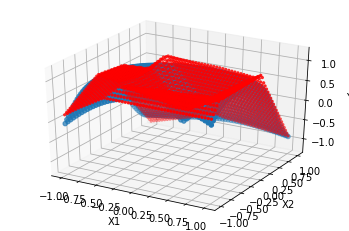

In [111]:
yout_0 = net_0.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_0.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Similar network with relu activation

In [81]:
optimizer = tnn.Adam()

net_1 = tnn.AutoForm(new_layers=True)
layer1_1 = tnn.NonLinearLayer(2, n_hidden+1, activation=tnn.Relu(),
                          optimizer=optimizer)
layer2_1 = tnn.NonLinearLayer(n_hidden+1, n_hidden2+1, activation=tnn.Relu(),
                              optimizer=optimizer)
layer3_1 = tnn.LinearLayer(n_hidden2+1,1, optimizer=optimizer)

In [82]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout_1 = net_1.forward(xx)
    dy = yout_1 - yy
    dx = net_1.backward(dy)
    
    net_1.update()
    
    ### Adding noise to the trained weights
#     if epoch%1000 == 0:
#         noise_old = 0.1
#         noise_old_w1 = np.random.normal(loc=0, scale=noise_old, size=layer1_0.weights.shape)
#         noise_old_b1 = np.random.normal(loc=0, scale=noise_old, size=layer1_0.bias.shape)

#         layer1_0.weights += noise_old_w1
#         layer1_0.bias += noise_old_b1

#         noise_old_w2 = np.random.normal(loc=0, scale=noise_old, size=layer2_0.weights.shape)
#         noise_old_b2 = np.random.normal(loc=0, scale=noise_old, size=layer2_0.bias.shape)

#         layer2_0.weights += noise_old_w2
#         layer2_0.bias += noise_old_b2
        
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout_1.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.38077025696607386


100 Error =  0.03273945268038742


200 Error =  0.011464111892858784


300 Error =  0.009169374244849066


400 Error =  0.00830527202258606


500 Error =  0.007898322260403205


600 Error =  0.0077018785401080005


700 Error =  0.007584466751616449


800 Error =  0.007510192080601106


900 Error =  0.007401852344182057


1000 Error =  0.0072731823900932255


1100 Error =  0.007222793738766197


1200 Error =  0.0071861603640157425


1300 Error =  0.0071603755492455545


1400 Error =  0.007141773946680758


1500 Error =  0.007120993670783838


1600 Error =  0.007102566279878648


1700 Error =  0.0070874081425447545


1800 Error =  0.007089225611688489


1900 Error =  0.007060876221991889


2000 Error =  0.007050053013847081


2100 Error =  0.00703166040688392


2200 Error =  0.007021649241680149


2300 Error =  0.007016349972091382


TclError: invalid command name "pyimage161"